Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Centroid for Questions: [0.01965602 0.002457   0.004914   0.00982801 0.00982801 0.002457
 0.01228501 0.03439803 0.004914   0.004914   0.002457   0.00737101
 0.002457   0.002457   0.002457   0.01228501 0.002457   0.002457
 0.004914   0.002457   0.002457   0.002457   0.002457   0.004914
 0.02948403 0.00982801 0.01474201 0.002457   0.002457   0.01719902
 0.03931204 0.004914   0.01228501 0.2039312  0.002457   0.002457
 0.01719902 0.01228501 0.00982801 0.002457   0.002457   0.00982801
 0.002457   0.002457   0.002457   0.002457   0.004914   0.004914
 0.23832924 0.002457   0.01474201 0.00737101 0.004914   0.01965602
 0.002457   0.00737101 0.004914   0.004914   0.002457   0.02457002
 0.002457   0.002457   0.004914   0.002457   0.002457   0.002457
 0.00737101 0.004914   0.002457   0.06142506 0.00737101 0.004914
 0.002457   0.002457   0.01228501 0.04668305 0.004914   0

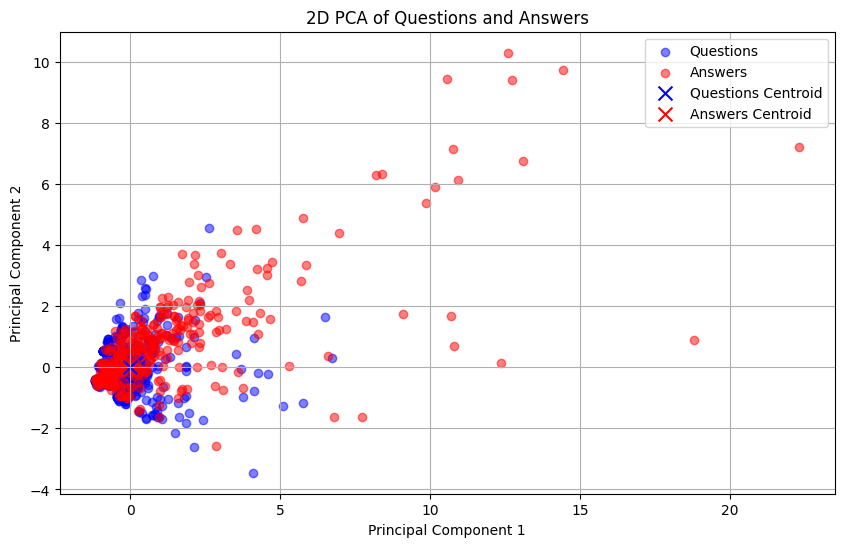

MEAN of No_of_questioning_words:  0.6275395033860045
VARIANCE of No_of_questioning_words:  0.8070971062272929


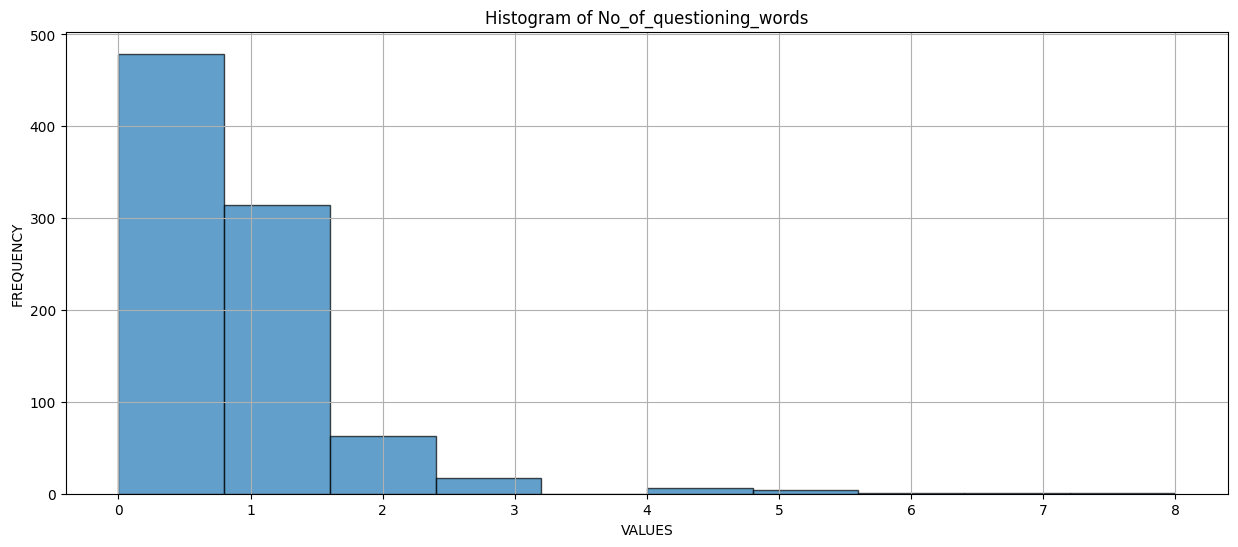

No_of_words               3
No_of_questoning_words    1
Has_Question_Mark         1
label                     1
Name: 0, dtype: object
No_of_words               21
No_of_questoning_words     2
Has_Question_Mark          1
label                      1
Name: 1, dtype: object


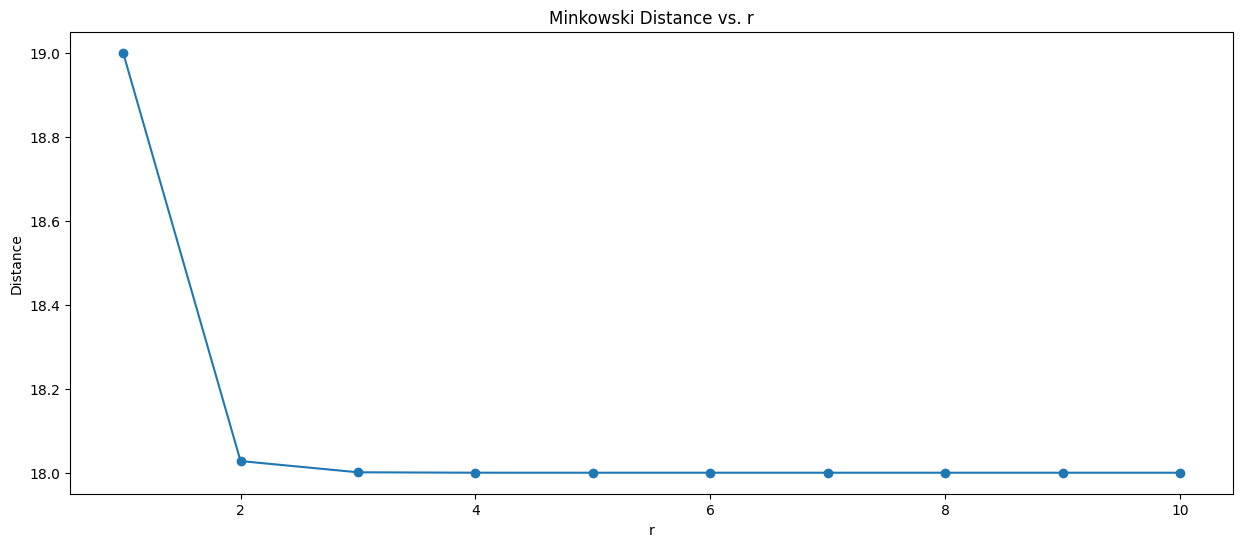

Training set: (620, 1574) Test set: (266, 1574)
PREDICTED VALUES FOR TEST DATA:
 [1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 1]
ACTUAL LABELS OF TEST DATA:
 [1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 

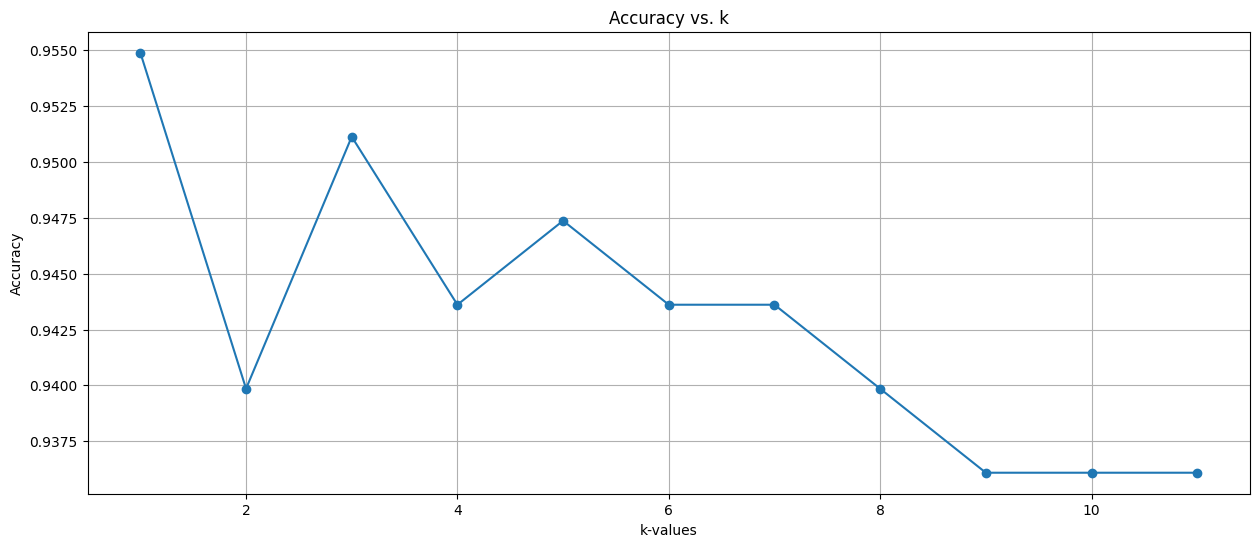

Confusion Matrix:
 [[138   5]
 [  7 116]]
Precision: 0.9586776859504132
Recall: 0.943089430894309
F1 Score: 0.9508196721311475


In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from scipy.sparse import hstack

def mean_calculation(vectors):
    #Calculates the mean vector
    return np.mean(vectors, axis=0)

def spread_calculation(vectors):
    #Calculates the spread-standard deviation of vectors
    return np.std(vectors, axis=0)

def euclidean_distance(centroid1, centroid2):
    #Calculates the Euclidean distance between two centroids
    return np.linalg.norm(centroid1 - centroid2)

def scatter_plotting(questions_pca, answers_pca, centroid_questions_2d, centroid_answers_2d):
    #Plots a scatter plot of PCA-transformed questions and answers with centroids
    plt.figure(figsize=(10, 6))
    #plotting observations
    plt.scatter(questions_pca[:, 0], questions_pca[:, 1], color='blue', alpha=0.5, label='Questions')
    plt.scatter(answers_pca[:, 0], answers_pca[:, 1], color='red', alpha=0.5, label='Answers')
    #plotting centroid for questions and answers
    plt.scatter(centroid_questions_2d[0], centroid_questions_2d[1], color='blue', marker='x', s=100, label='Questions Centroid')
    plt.scatter(centroid_answers_2d[0], centroid_answers_2d[1], color='red', marker='x', s=100, label='Answers Centroid')
    #labeling
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA of Questions and Answers')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_histogram(feature_values):
    #Plots a histogram of feature values
    plt.figure(figsize=(15, 6))
    plt.hist(feature_values, bins=10, edgecolor='black', alpha=0.7)
    #labeling
    plt.title("Histogram of No_of_questioning_words")
    plt.xlabel("VALUES")
    plt.ylabel("FREQUENCY")
    plt.grid(True)
    plt.show()

def minkowski_distance(vector1, vector2):
    #Calculates Minkowski distance for r from 1 to 10
    distance = []
    for r in range(1, 11):
        dist = np.sum(np.abs(vector1 - vector2) ** r) ** (1 / r)
        distance.append(dist)
    return distance

def plot_minkowski_distance(distance):
    #Plots Minkowski distance vs. r
    plt.figure(figsize=(15, 6))
    plt.plot(range(1, 11), distance, marker='o')
    #labeling
    plt.title('Minkowski Distance vs. r')
    plt.xlabel('r')
    plt.ylabel('Distance')
    plt.show()

def train_and_evaluate_knn(X_train, X_test, Y_train, Y_test):
    #Trains and evaluates kNN classifier for varying k values
    accuracies = []
    for k in range(1, 12):
        KNN = KNeighborsClassifier(n_neighbors=k)
        #training
        KNN.fit(X_train, Y_train)
        accuracies.append(KNN.score(X_test, Y_test))
    return accuracies

def main():
    # Mount Google Drive to access the dataset
    drive.mount('/content/drive')

    # Loads the dataset from Google Drive
    sentence_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MLLAB3.xlsx')

    # Separates questions and answers based on labels
    questions = sentence_data[sentence_data['label'] == 1]['Text']
    answers = sentence_data[sentence_data['label'] == 0]['Text']

    # Vectorizes the text data using CountVectorizer
    vectorizer = CountVectorizer()
    questions_vectors = vectorizer.fit_transform(questions).toarray()
    answers_vectors = vectorizer.transform(answers).toarray()

    # Calculates mean vector for questions and answers
    centroid_questions = mean_calculation(questions_vectors)
    centroid_answers = mean_calculation(answers_vectors)
    print("Centroid for Questions:", centroid_questions)
    print("Centroid for Answers:", centroid_answers)

    # Calculates and print the spread (standard deviation) for questions and answers
    spread_questions = spread_calculation(questions_vectors)
    spread_answers = spread_calculation(answers_vectors)
    print("Spread for Questions:", spread_questions)
    print("Spread for Answers:", spread_answers)

    # Calculates and print the Euclidean distance between centroids
    distance = euclidean_distance(centroid_questions, centroid_answers)
    print(f"Distance between the centroids: {distance:.2f}")

    # Reduces dimensionality to 2D using PCA
    pca = PCA(n_components=2)
    questions_pca = pca.fit_transform(questions_vectors)
    answers_pca = pca.transform(answers_vectors)

    # Calculates new centroids in 2D PCA space
    centroid_questions_2d = mean_calculation(questions_pca)
    centroid_answers_2d = mean_calculation(answers_pca)

    # Plots the PCA results
    scatter_plotting(questions_pca, answers_pca, centroid_questions_2d, centroid_answers_2d)

    # Analyzes the 'No_of_questioning_words' feature
    feature_name = 'No_of_questoning_words'
    feature_values = sentence_data[feature_name]
    mean = np.mean(feature_values)
    variance = np.var(feature_values)
    print("MEAN of No_of_questioning_words: ", mean)
    print("VARIANCE of No_of_questioning_words: ", variance)

    # Plots histogram of 'No_of_questioning_words' feature
    plot_histogram(feature_values)
    # Calculates and plots Minkowski distance between two feature vectors
    vector1 = sentence_data.iloc[0, 1:]
    vector2 = sentence_data.iloc[1, 1:]
    print(vector1)
    print(vector2)
    distance = minkowski_distance(vector1, vector2)
    plot_minkowski_distance(distance)

    # Preparing data for kNN classification
    features_text = sentence_data['Text']
    # Initializes the TF-IDF vectorizer to convert text data into numerical features
    tfidf_vectorizer = TfidfVectorizer()
    # Transforms the text data into TF-IDF features
    text_features = tfidf_vectorizer.fit_transform(features_text)
    # Extracts numerical features from the dataset
    numerical_features = sentence_data.iloc[:, 1:-1].values
    # Combines numerical features and TF-IDF text features into a single feature matrix
    features = hstack([numerical_features, text_features])
    # Extracts the labels from the dataset
    labels = sentence_data['label']
    # Split the data into training and test sets 7:3 ratio
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    # Prints the shapes of the training and test sets to verify the split
    print("Training set:", features_train.shape, "Test set:", features_test.shape)


    # Training and evaluating kNN classifier with k=3 and k=1
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(features_train, labels_train)
    labels_pred = KNN.predict(features_test)
    print("PREDICTED VALUES FOR TEST DATA:\n", labels_pred)
    print("ACTUAL LABELS OF TEST DATA:\n", labels_test.values)

    # Selects a specific test vector (e.g., the first one in the test set)
    test_vect = features_test[0]

    # Ensures the test vector is reshaped to 2D
    predicted_class = KNN.predict(test_vect.reshape(1, -1))
    print("Predicted class for the selected test vector:", predicted_class)
    # Prints the actual class for comparison
    print("Actual class for the selected test vector:", labels_test.iloc[0])

    accuracy3 = KNN.score(features_test, labels_test)
    print(f"ACCURACY OF KNN CLASSIFIER WITH K=3: {accuracy3 * 100:.2f}%")

    KNN = KNeighborsClassifier(n_neighbors=1)
    KNN.fit(features_train, labels_train)
    labels_pred = KNN.predict(features_test)
    accuracy1 = KNN.score(features_test, labels_test)
    print(f"ACCURACY OF KNN CLASSIFIER WITH K=1: {accuracy1 * 100:.2f}%")

    # Trains and evaluates kNN classifier for varying k values
    accuracies = train_and_evaluate_knn(features_train, features_test, labels_train, labels_test)
    # Plots accuracy vs. k
    plt.figure(figsize=(15, 6))
    plt.plot(range(1, 12), accuracies, marker='o')
    plt.grid(True)
    #labeling
    plt.title('Accuracy vs. k')
    plt.xlabel('k-values')
    plt.ylabel('Accuracy')
    plt.show()

    # Prints confusion matrix and performance metrics for the final model
    conf_matrix = confusion_matrix(labels_test, labels_pred)
    precision = precision_score(labels_test, labels_pred)
    recall = recall_score(labels_test, labels_pred)
    f1 = f1_score(labels_test, labels_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

if __name__ == "__main__":
    main()
